# Correlation Analysis

## Techniques to use:
1. Crosstabs (contingency table) -> nominal, ordinal
2. Scatterplot -> quantitative
3. Computer Pearson's r

In [1]:
import pandas as pd

df = pd.read_csv('data/healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [2]:
print(df.smoking_status.value_counts())
print("----------------------")
print(df.work_type.value_counts())

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64
----------------------
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64


## Nominal columns:
* gender
* ever_married
* work_type
* Residence_type
* smoking_status
## Ordinal columns:
* hypertension
* heart_disease
## Quantitative columns:
* age
* avg_glucose_level
* bmi

# Crosstabs (contingency table)

In [3]:
def crosstab(column1: str, column2: str = 'stroke') -> None:
    crosstab_column = pd.crosstab(df[column1],
                                  df['stroke'],
                                  normalize='index') * 100
    print(crosstab_column)

In [4]:
crosstab('gender')
print("----------------------")
crosstab('ever_married')
print("----------------------")
crosstab('work_type')
print("----------------------")
crosstab('Residence_type')
print("----------------------")
crosstab('smoking_status')
print("----------------------")
crosstab('hypertension')
print("----------------------")
crosstab('heart_disease')

stroke           0         1
gender                      
Female   95.290581  4.709419
Male     94.893617  5.106383
Other   100.000000  0.000000
----------------------
stroke                0         1
ever_married                     
No            98.349459  1.650541
Yes           93.438712  6.561288
----------------------
stroke                  0         1
work_type                          
Govt_job        94.977169  5.022831
Never_worked   100.000000  0.000000
Private         94.905983  5.094017
Self-employed   92.063492  7.936508
children        99.708879  0.291121
----------------------
stroke                  0         1
Residence_type                     
Rural           95.465394  4.534606
Urban           94.799692  5.200308
----------------------
stroke                   0         1
smoking_status                      
Unknown          96.955959  3.044041
formerly smoked  92.090395  7.909605
never smoked     95.243129  4.756871
smokes           94.676806  5.323194
---------

* We can see that gender does not have a significant impact on stroke.
* Residence type does not have a significant impact on stroke.
---
* Married people are more likely to have a stroke than unmarried people.
* Self-employed people are more likely to have a stroke than people in other work types.
* Smoking status needs more looking into.
* Hypertension and heart disease have a significant impact on stroke.


In [5]:
df['smoking_status'].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

## Scatterplot & Pearson's r

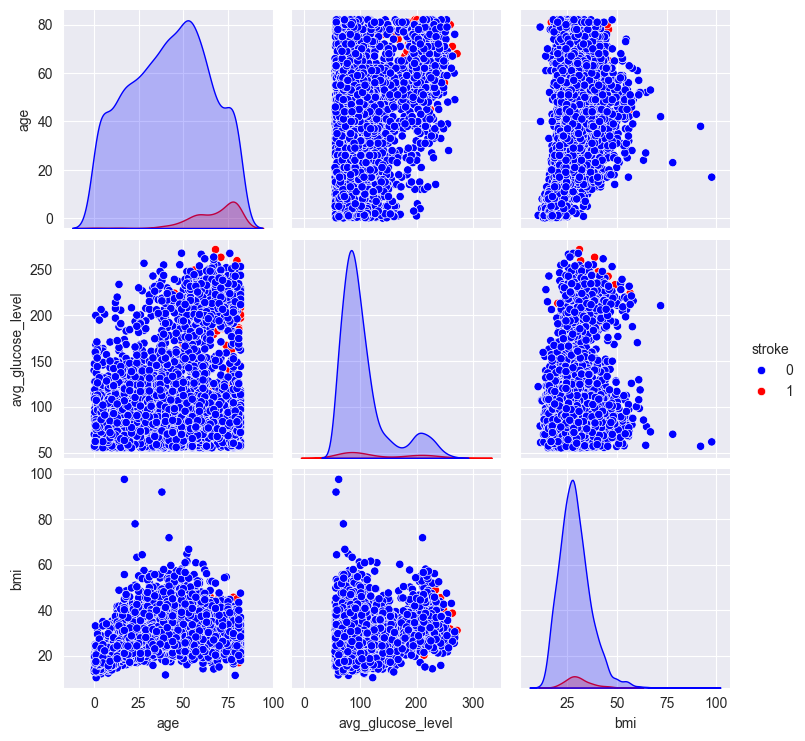

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df[['age', 'avg_glucose_level', 'bmi', 'stroke']],
             hue='stroke', palette=['blue', 'red'])
plt.show()

* We can see that there is no clear correlation between age, glucose level, and bmi.

In [7]:
# Check Pearson correlation
df_numeric = df[['age', 'avg_glucose_level', 'bmi', 'stroke']]
correlation_matrix = df_numeric.corr()
correlation_matrix


,age,avg_glucose_level,bmi,stroke
age,1.000000,0.238171,0.333398,0.245257
avg_glucose_level,0.238171,1.000000,0.175502,0.131945
bmi,0.333398,0.175502,1.000000,0.042374
stroke,0.245257,0.131945,0.042374,1.000000


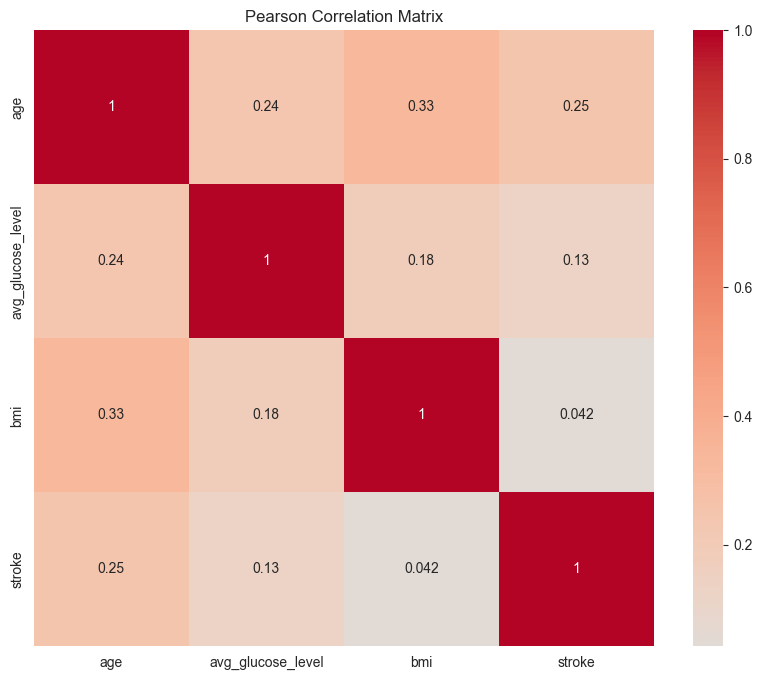

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Pearson Correlation Matrix')
plt.show()

* Pearson's r confirms that there is no clear correlation between age, glucose level, and bmi.
* However, there is little correlation between age and stroke as well as age and bmi.

# Summary
* Gender and residence type are not significant factors in stroke and could be dropped from the model.
* avg glucose level and bmi are not significant factors in stroke and could be dropped from the model.